# FGGLIB Introduction

FGGLIB is a Python library and provides factor graph grammar algorithms presented in the paper by Chiang and Riley. This notebook is to guide through the library and shows examples on how to build factor graphs, factor graph grammars and to run conjunction and inference algorithms.
This library consists of two main parts, factor graph (FG) which provide an important basis for defining and building graphs, fragments and mapping of weight or anyfunctions and factor graph grammar (FGG) which contains functionalities to build factor graph grammars and conjunction and inference algorithms.

### Documentation
There is extensive documentation for the library. It can be viewed via the index.html file in the docs folder of the source code. The documentation is generated using pdoc and comes with links and references. 

*** 

## Hypergraph
Hypergraph is a graph with an arbitrary number of vertices connected to an edge. Hypergraphs generated in this library are undirected.  

Class *Hypergraph* generates an object with vertex and edge that can contain edge and vertex objects. They are created from *Edge* and *Vertex* classes and allow to define labels. Mapping of one or more nodes to an edge are are also defined in class *Edge*.


{Vertex: 1, Vertex: 2, Vertex: 3}
{Edge a1: [Vertex: 1, Vertex: 2], Edge a3: [Vertex: 1, Vertex: 3], Edge a4: [Vertex: 2, Vertex: 3], Edge a2: [Vertex: 2, Vertex: 3]}


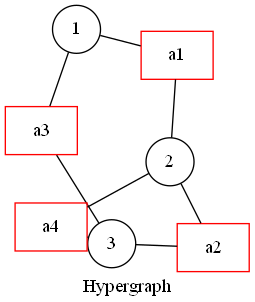

In [6]:
from IPython.display import Image
from fgglib.presentation.visualization import Visualization
from fgglib.fg.hypergraph import Hypergraph
from fgglib.fg.vertex import Vertex
from fgglib.fg.edge import Edge

hypergraph = Hypergraph()

#initializes vertex with content and label
vertex1 = Vertex('1','1')
vertex2 = Vertex('2','2')
vertex3 = Vertex('3','3')

#adds initialized vertices to the hypergraph
hypergraph.add_vertex(vertex1)
hypergraph.add_vertex(vertex2)
hypergraph.add_vertex(vertex3)

#initializates edge with content and maps nodes to be connected with
# edge = Edge(content, label)
edge1 = Edge({'1', '2'},'a1')
edge1.add_target(vertex1)
edge1.add_target(vertex2)

edge2 = Edge({'2', '3'},'a2')
edge2.add_target(vertex2)
edge2.add_target(vertex3)

edge3 = Edge({'1', '3'},'a3')
edge3.add_target(vertex1)
edge3.add_target(vertex3)

edge4 = Edge({'2', '3', '4', '5'},'a4')
edge4.add_target(vertex2)
edge4.add_target(vertex3)

#adds edges to the hypergraph
hypergraph.add_edge(edge1)
hypergraph.add_edge(edge2)
hypergraph.add_edge(edge3)
hypergraph.add_edge(edge4)

print(hypergraph.V)
print(hypergraph.E)

imgname="Hypergraph"
Visualization().draw(hypergraph, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)

***

## Factor Graph

Now we create factor graphs that inherit the properties of the hypergraph. Factor graph consists of graph nodes and factors and come equipped with a mapping of the vertices to a variable domain and a Factorfunction as properties of the edges.
In this example we use the Tropical semiring.

We use example 3 from the paper to generate factor graph with the same notation. Vertices are drawn as circles and edges as rectangles connecting the vertices. <br> <br>
 <img src="https://github.com/jolee1101/misc/blob/main/fg_exp3.png?raw=true" width="450"/> <br>


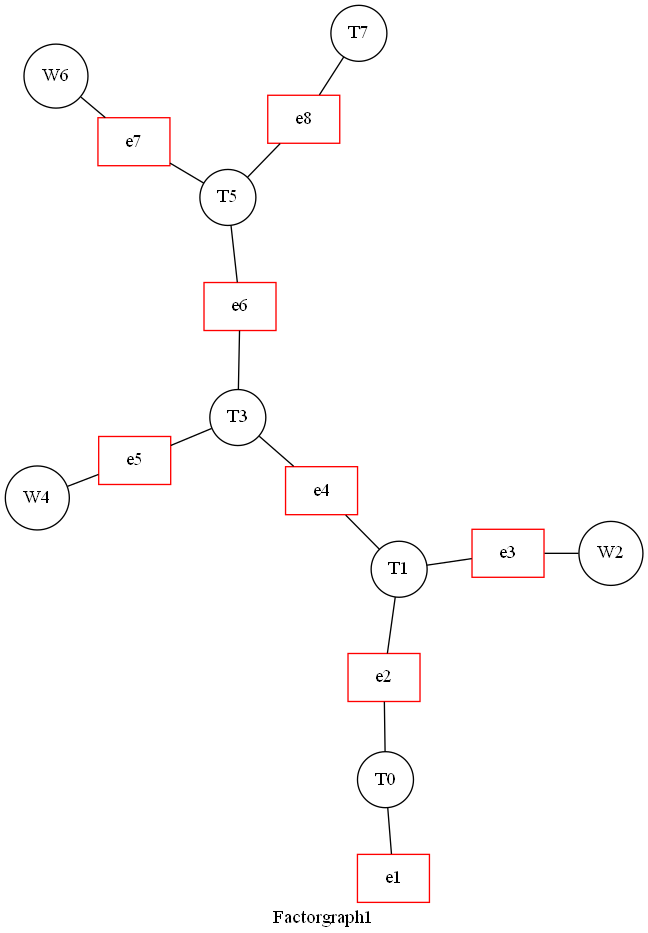

In [8]:
from fgglib.fg.factorgraph import Factorgraph
from fgglib.base.semiring import Tropical
from fgglib.fg.functions.discretedensity import DiscreteDensity
from fgglib.fg.variabledomain import VariableDomain

R=Tropical

#initiales factor graph with the tropical semiring
fg = Factorgraph(R)

#Defines the name of vertices to be created
vertexSet = ('T0','T1','W2','T3','W4','T5','W6','T7')

#Class VariableDomain defines the set of variables in FGG 
#By setting False as an argument the domain has finite set of variables
#and sets values that a variable can assume.
domain = VariableDomain(False)
domain.set_content({0,1})


#Creates a factor graph with a set of vertices, semiring and the domain
#Keeps the content vertex empty for now (=None)
fg.createVertices(None, vertexSet, R, domain)


#Defines content, labels, vertix edges to be connected with and the semiring.
#Keeps the function empty (described later)
fg.createEdge('BOS','e1', {'T0'}, None, R)
fg.createEdge('T1|T0','e2', {'T0','T1'}, None, R)
fg.createEdge('W2|T1','e3', {'T1','W2'}, None, R)
fg.createEdge('T3|T1','e4', {'T1','T3'}, None, R)
fg.createEdge('W4|T3','e5', {'T3','W4'}, None, R)
fg.createEdge('T5|T3','e6', {'T3','T5'}, None, R)
fg.createEdge('W6|T5','e7', {'T5','W6'}, None, R)
fg.createEdge('T7|T5','e8', {'T5','T7'}, None, R)

imgname="Factorgraph1"
Visualization().draw(fg, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)

A factor graph can also have a function *F* that maps edges and FGGLIB provides three different function types: 
- circuit
- discrete density
- normal density functions

Below we use discrete density function with numerical values to  calculate marginals.
Factor graph is built with:
- Vertex:   'X1','X2','X3','X4'
- Edges:    edge 'fa' connects edges 'X1' and 'X2'
            edge 'fb' connects edges 'X2' and 'X3'
            edge 'fc' connects edges 'X2' and 'X4'
- finite domain 

Normalization constant: 0.168


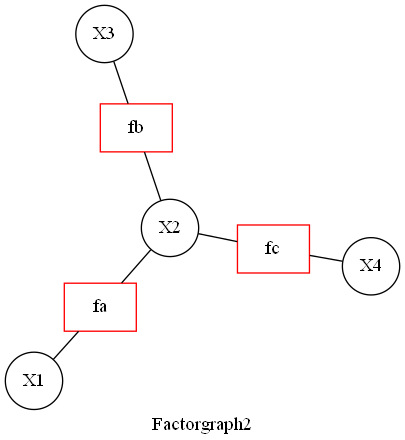

In [21]:
from fgglib.fg.variabledomain import VariableDomain
from fgglib.autotesting.testenvironment import *


factorgraph2 = buildGraph(
    ['X1','X2','X3','X4'], 
    {'fa':['X1','X2'],'fb':['X2','X3'],'fc':['X2','X4']},
    Real
)

#sets the domain for vertex X1
#uses method get_vertex(label of vertex)
factorgraph2.get_vertex('X1').domain = domain
factorgraph2.get_vertex('X2').domain = domain
factorgraph2.get_vertex('X3').domain = domain
factorgraph2.get_vertex('X4').domain = domain


#sets a discret density function for all edges
#uses method get_edge(label of vertex) to get vertex object in the factor graph
factorgraph2.set_function(factorgraph2.get_edge('fa'), DiscreteDensity([[0.3, 0.2, 0.1],[0.3, 0, 0.1]]))
factorgraph2.set_function(factorgraph2.get_edge('fb'), DiscreteDensity([[0.3, 0.2],[0.3, 0],[0.1, 0.1]]))
factorgraph2.set_function(factorgraph2.get_edge('fc'), DiscreteDensity([[0.3, 0.2],[0.3, 0],[0.1, 0.1]]))


#calculate normalization constant
#by first computing the sum-product of a factor graph
#then 
print("Normalization constant: " 
      + str(factorgraph2.normalization_constant()))

imgname="Factorgraph2"
Visualization().draw(factorgraph2, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)

An example of factor graph using tropical multiplicative function is provided below.

Factor graph is built with:
- Vertex:   'X1','X2','X3','X4'
- Edges:    edge 'fa' connects edges 'X1' and 'X2'
            edge 'fb' connects edges 'X2' and 'X3'
            edge 'fc' connects edges 'X2' and 'X4'
- finite domain sets with values {1, 2, 3} and {4, 5}

14
15
16
14
16
19
17
18


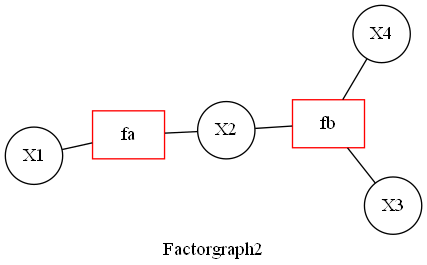

In [22]:
from fgglib.fg.functions.tropicalmul import TropicalMul

domain1 = VariableDomain(False)
domain1.set_content({1,2,3})
domain2 = VariableDomain(False)
domain2.set_content({4,5})

fgTropical = buildGraph(
    ['X1','X2','X3','X4'],
    {'fa':['X1','X2'],'fb':['X2','X3','X4']},
    Tropical
)

fgTropical.get_vertex('X1').domain = domain1
fgTropical.get_vertex('X2').domain = domain2
fgTropical.get_vertex('X3').domain = domain1
fgTropical.get_vertex('X4').domain = domain2

fgTropical.set_function(fgTropical.get_edge('fa'), TropicalMul(2))
fgTropical.set_function(fgTropical.get_edge('fb'), TropicalMul(3))

marginals = fgTropical.sum_product()
print(marginals[fgTropical.get_vertex('X1')].compute(1).score)
print(marginals[fgTropical.get_vertex('X1')].compute(2).score)
print(marginals[fgTropical.get_vertex('X1')].compute(3).score)
print(marginals[fgTropical.get_vertex('X2')].compute(4).score)
print(marginals[fgTropical.get_vertex('X2')].compute(5).score)
print(marginals[fgTropical.get_vertex('X3')].compute(6).score)
print(marginals[fgTropical.get_vertex('X4')].compute(7).score)
print(marginals[fgTropical.get_vertex('X4')].compute(8).score)

imgname="Factorgraph2"
Visualization().draw(fgTropical, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)

## Factor Graph Grammars

FGG is a 4-Tuple <T,N,S,P> where:
- *N* is a finite set of nonterminal symbols
- *S* is a string (or label) for the starting nonterminal
- *T* is a finite set of terminal symbols (corresponds to factor graph fragments in our library)
- *P* is a finite set of production rules of the form (*X* ➝ *R*), where *X* is an element of nonterminal N and R is a factor graph fragment with edge labels in *N* ∪ *T*

Product rules are derived in a way that fragments are continuously replaced with other fragments until the factor graph reachs an external node. 


Here, we create an FGG for derivations of a CFG in Chomsky Normal Form which was presented in lecture note 6.

<img src="https://github.com/jolee1101/misc/blob/main/the_big_male.png?raw=true" width="130"/> <br> 
- *Nominal* ➝ *DET* *NP* <br>
- *NP* ➝ *ADJ* *NP* <br>
- *NP* ➝ *N* <br>
- *DET* ➝ *the* <br>
- *ADJ* ➝ big <br>
- *N* ➝ male <br>


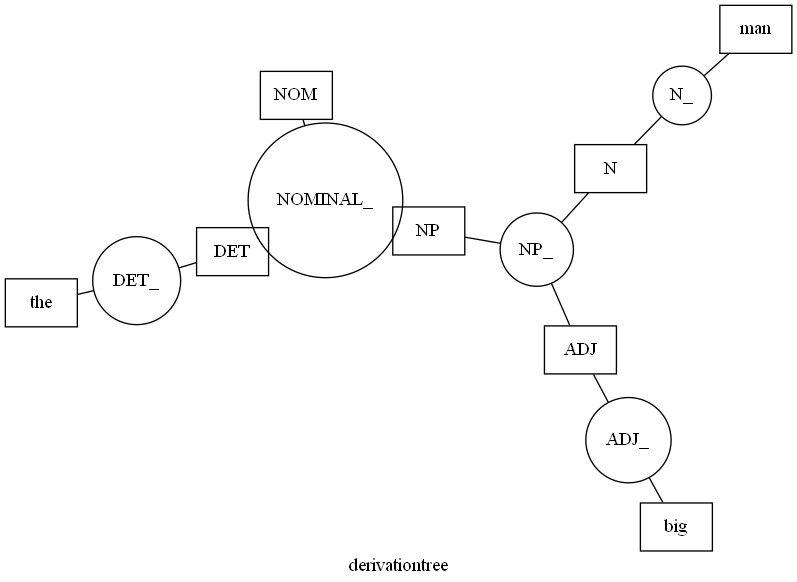

In [25]:
from fgglib.fgg.fgg import FGG
from fgglib.fgg.production import Production
from fgglib.fg.fragment import Fragment

#creates a fragment for each nonterminal
nominal = buildFragment(
    {'NOM','DET', 'NP'}, # V
    [('NOMINAL_', {'NOM','DET', 'NP'})], # E
    {'DET', 'NP'}, # ext
)

determinant = buildFragment(
    {'DET', 'the'}, # V
    [('DET_', {'DET','the'})], # E
    {'the'}, # ext
)

nounphrase = buildFragment(
    {'NP', 'ADJ', 'N'}, # V
    [('NP_', {'NP', 'ADJ','N'})], # E
    {'ADJ','NP'}, # ext
)

adj = buildFragment(
     {'ADJ', 'big'}, # V
    [('ADJ_', {'ADJ','big'})], # E
    {'big'}, # ext
)

noun = buildFragment(
    {'N', 'man'}, # V
    [('N_', {'N','man'})], # E
    {'man'}, # ext
)

#this derivation tree contains CFG and can build a derivation tree
derivationtree = FGG({nominal,determinant, nounphrase, adj, noun}, # T
    {'NOMINAL','DET', 'NP', 'ADJ', 'N'}, # N
    {'NOMINAL'}, # S
    {Production('S', nominal),
     Production('Det', determinant),
     Production('NP', nounphrase),
     Production('Adj', adj),
     Production('N', noun)} # P
)

imgname="derivationtree"
Visualization().draw(derivationtree, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)

***

## Conjunction

For conjunction we continue to use the example of "the big male" from the previous part: "derivationtree" and "noun" are conjoined in order to calculate the marginal distribution of the noun "male". As a result of conjunction a new FGG is returned with conjoined pairs of rules.

In [ ]:
nounFGG = FGG(
    {noun}, # T
    {'X'}, # N
    'S', # S
    {Production('X',noun)} # P
)

conjoined = derivationtree.conjunction(nounFGG)
imgname = str("conjoined")
Visualization().draw(conjoined, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)


In [ ]:
#another example of conjunction

frag1 = buildFragment(
    {'T1', 'T2'}, # V
    [('P', {'T1','T2'}), ('EOS', {'T2'})], # E
    {'T1'} # ext
)

frag2 = buildFragment(
    {'T1'},
    [('BOS',{'T1'}),('X2',{'T1'})],
    {}
)

frag3 = buildFragment(
    {'T1','T2','W3'},
    [('P21',{'T1','T2'}),('P32',{'T2','W3'}),('X4',{'T2'})],
    {'T1'}
)

frag4 = buildFragment(
    {'T1','T2'}, # V
    [], # E
    {'T1'} # ext
)

frag5 = buildFragment(
    {'T1'},
    [('(0)2',{'T1'})],
    {}
)

frag6 = buildFragment(
    {'T1','T2','W3'},
    [('(i)4',{'T2'}),('wi',{'W3'})],
    {'T1'}
)

conFGG1 = FGG(
    {frag1,frag2,frag3}, # T
    {'S','X','X4','X2'}, # N
    'S', # S
    {Production('X',frag1),
     Production('S',frag2),
     Production('X',frag3)} # P
)

imgname = str("conjoined1")
Visualization().draw(conFGG1, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)


In [ ]:
#FGG to be conjoined with the above example
conFGG2 = FGG(
    {frag4,frag5,frag6}, # T
    {'(n)','S','(i-1)','(i)4','(0)2'}, # N
    'S', # S
    {Production('(n)',frag4),
     Production('S',frag5),
     Production('(i-1)',frag6)} # P
)

imgname = str("conjoined2")
Visualization().draw(conFGG2, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)


In [ ]:
conjoined1_2= conFGG1.conjunction(conFGG2)

imgname = str("conjoined1_2")
Visualization().draw(conjoined1_2, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)

***
## Inference

FGGLIB is able to compute the sum-product of factor graph grammars. We can distinguish between three cases of inference on FGGs:
1. FGGs with finite variable domain, but infinite graph language 
2. FGGs with infinite varaible domain, but finite graph language
3. FGGs with inifite variable domain and inifite graph language

Inference is only decidable in the first two cases. For the last one, it is undecidable. 

Consider a grammar with finite variable domain: 

In [ ]:
# We use a simple multiplicative factorfunction for the factors (We could have used a predefined one)
class MultiplicativeFactorFunction(FactorFunction):
    def __init__(self):
        super().__init__(Real,1)

    def compute(self,*args):
        result = 1
        for a in args:
            result*=a
        return result

# Instantiate the Function
mff = MultiplicativeFactorFunction()

# Define one terminal or our grammar
recFrag1 = buildFragment(
    {'EXT1', 'EXT2'}, # V
    [('l', {'EXT1','EXT2'})], # E
    {'EXT1','EXT2'}, # ext
)
for e in recFrag1.E:
    recFrag1.set_function(e,mff)

# Define a second terminal of our grammar 
recFragp = buildFragment(
    {'V'}, # V
    [('X', {'V','V'})], # E
    {}, # ext
)
recFragp.get_edge('X').add_target(recFragp.get_vertex('V'))
for e in recFragp.E:
    recFragp.set_function(e,mff)

# Define the actual grammar
nonRecFGG = FGG(
    {recFrag1, recFragp}, # T
    {'S','X'}, # N
    'S', # S
    {Production('S',recFragp),
     Production('X',recFrag1)}, # P
)

# Set some variable domains
nonRecFGG.set_variable_domain('V',defaultDomain)
nonRecFGG.set_variable_domain('EXT1',defaultDomain)
nonRecFGG.set_variable_domain('EXT2',defaultDomain)

# Run the finite variable inference algorithm
fggsp = FGGsum_product(nonRecFGG)
print(fggsp.inference())

The above application of the inference algorithm computes the sum-product for a nonrecursive grammar. In this case, a direct computation of the variables for finite variable inference is used. We can see a more sophisticated example of finite variable inference below:

In [ ]:
from fgglib.fgg.fggsum_product import FGGsum_product

#similar to the previous examples
#we build fragments to build a FGG
recFrag1 = buildFragment(
    {'EXT1', 'EXT2'}, # V
    [('l', {'EXT1','EXT2'})], # E
    {'EXT1','EXT2'}, # ext
)

recFragp = buildFragment(
    {'V'}, # V
    [('X', {'V'})], # E
    {}, # ext
)
recFragp.get_edge('X').add_target(recFragp.get_vertex('V')) # workaround for edge assignment of the test environment

#after building fragments FGG is generated.
nonRecFGG = FGG(
    {recFrag1, recFragp}, # T
    {'S','X'}, # N
    'S', # S
    {Production('S',recFragp),
     Production('X',recFrag1)}, # P
)

domain = VariableDomain(False)
domain.set_content({0.5})

nonRecFGG.set_variable_domain('V',domain)
nonRecFGG.set_variable_domain('EXT1',domain)
nonRecFGG.set_variable_domain('EXT2',domain)

imgname = str("nonRecursiveFGG")
Visualization().draw(nonRecFGG, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)


In [ ]:
#Inference of the above example
fggsp = FGGsum_product(nonRecFGG)
print("Inference: "+str(fggsp.inference()))

#checks to determine recursion and reentrance
print("FGG is recursive? :" + str(nonRecFGG.recursive()))
print("FGG is linearly recursive? :" + str(nonRecFGG.linearly_recursive()))
print("FGG is linearly reentrant? :" + str(nonRecFGG.reentrant()))

In [ ]:
recFrag0 = buildFragment(
    {'EXT1', 'EXT2'}, # V
    [('X', {'EXT1','EXT2'})], # E
    {'EXT1','EXT2'}, # ext
)

recFrag1 = buildFragment(
    {'EXT1', 'EXT2'}, # V
    [('l', {'EXT1','EXT2'})], # E
    {'EXT1','EXT2'}, # ext
)

recFragp = buildFragment(
    {'V'}, # V
    [('X', {'V','V'})], # E
    {}, # ext
)
recFragp.get_edge('X').add_target(recFragp.get_vertex('V')) # workaround for edge assignment of the test environment

nonlinRecFrag1 = buildFragment(
    {'EXT1', 'EXT2', 'V'}, # V
    [('X', {'EXT1','V'}), ('X',{'V','EXT2'})], # E
    {'EXT1','EXT2'}, # ext
)

domain = VariableDomain(False)
domain.set_content({0.5})

nonlinRecFGG = FGG(
    {recFrag0, recFrag1, nonlinRecFrag1}, # T
    {'S','X'}, # N
    'S', # S
    {Production('S',recFragp),
     Production('X',nonlinRecFrag1),
     Production('X',recFrag1)} # P
)
nonlinRecFGG.set_variable_domain('V',domain)
nonlinRecFGG.set_variable_domain('EXT1',domain)
nonlinRecFGG.set_variable_domain('EXT2',domain)

imgname = str("nonLinearlyRecursiveFGG")
Visualization().draw(nonlinRecFGG, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)


In [ ]:
#Inference of the above example
fggsp = FGGsum_product(nonlinRecFGG)
print("Inference: "+str(fggsp.inference()))

#checks to determine recursion and reentrance
print("FGG is recursive? :" + str(nonlinRecFGG.recursive()))
print("FGG is linearly recursive? :" + str(nonlinRecFGG.linearly_recursive()))
print("FGG is linearly reentrant? :" + str(nonlinRecFGG.reentrant()))